/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

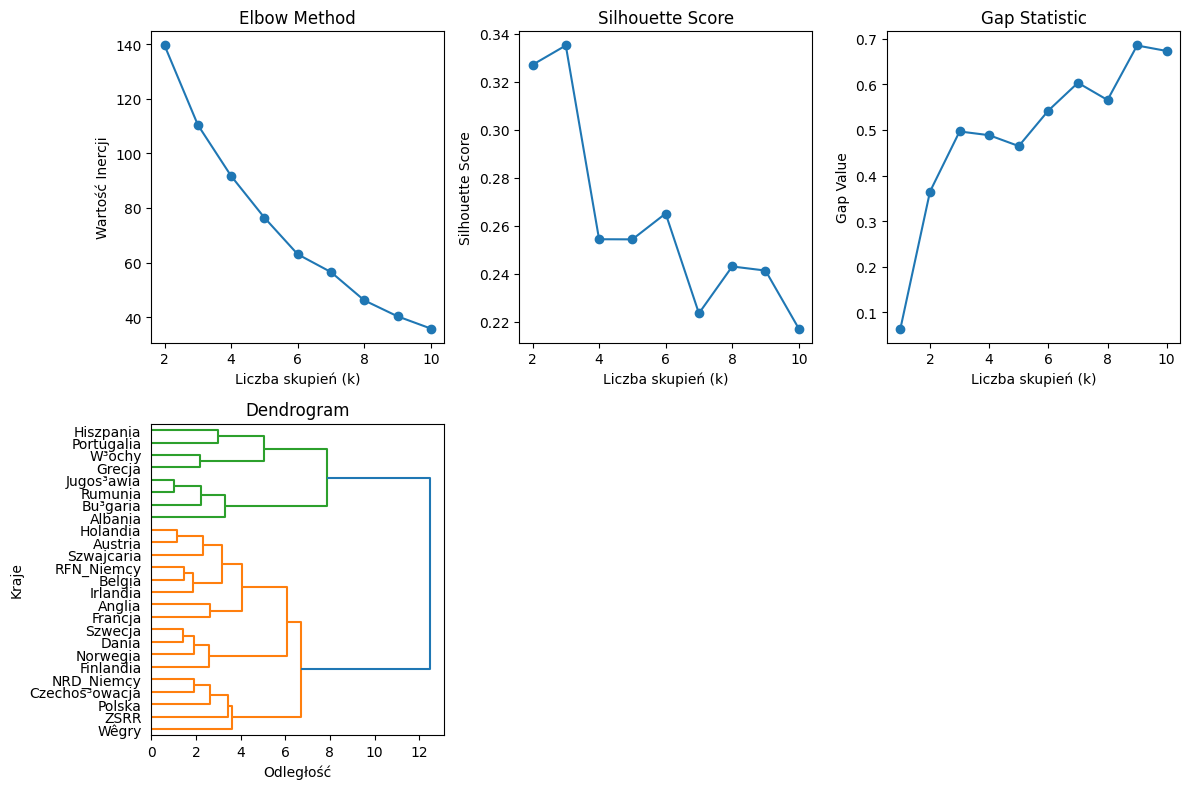

Optymalna liczba skupień według metody łokcia: 10
Optymalna liczba skupień według metody silhouette: 3
Optymalna liczba skupień według metody gap_statistic: 9
Optymalna liczba skupień: 9

Liczba obiektów w każdym skupieniu:
1    4
0    4
3    4
2    4
8    3
5    2
4    2
6    1
7    1
Name: Cluster, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


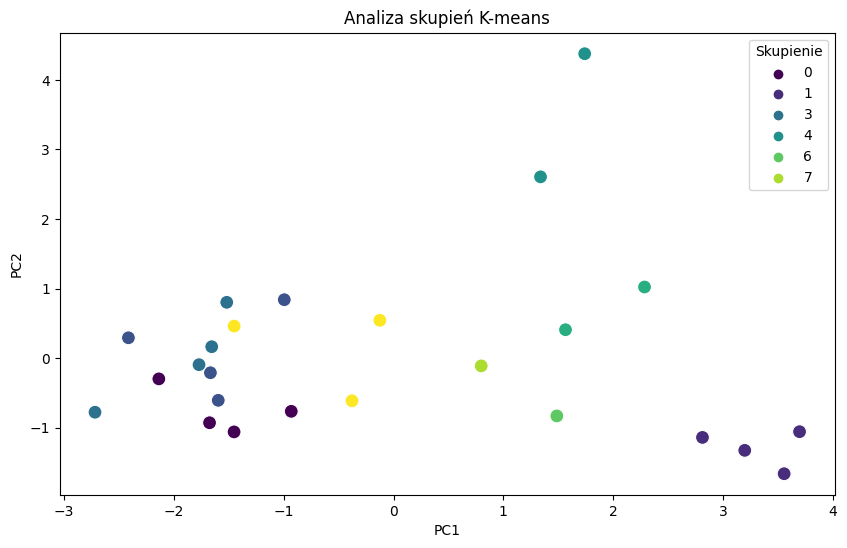

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#!pip install gap_stat
from gap_statistic import OptimalK
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Wczytaj dane z pliku CSV
df = pd.read_csv('jedzenie.csv', sep=';', decimal=',', encoding='latin1')
countries = df.iloc[:, 0]
df = df.iloc[:, 1:]
df = df.astype(float)

# Standaryzacja danych
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Wybranie zakresu liczby skupień do przetestowania
k_values = range(2, 11)

# Metoda łokcia (elbow method)
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

# Metoda silhouette
silhouette_scores = [silhouette_score(df_scaled, KMeans(n_clusters=k, random_state=42).fit_predict(df_scaled)) for k in k_values]

# Metoda gap_statistic
optimal_k = OptimalK(parallel_backend='joblib')
n_clusters = optimal_k(df_scaled.values, cluster_array=np.arange(1, 11))

# Wykonanie analizę skupień hierarchicznych
linkage_matrix = linkage(df_scaled, method='ward', metric='euclidean')

# Wyświetlenie dendrogramy
plt.figure(figsize=(12, 8))

# Wykres metody łokcia
plt.subplot(2, 3, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Liczba skupień (k)')
plt.ylabel('Wartość Inercji')

# Wykres metody silhouette
plt.subplot(2, 3, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Liczba skupień (k)')
plt.ylabel('Silhouette Score')

# Wykres metody gap
plt.subplot(2, 3, 3)
plt.plot(optimal_k.gap_df.n_clusters, optimal_k.gap_df.gap_value, marker='o')
plt.title('Gap Statistic')
plt.xlabel('Liczba skupień (k)')
plt.ylabel('Gap Value')

# Dendrogram
plt.subplot(2, 3, 4)
dendrogram(linkage_matrix, labels=countries.values, orientation='right')
plt.xlabel('Odległość')
plt.ylabel('Kraje')
plt.title('Dendrogram')

plt.tight_layout()
plt.show()

# Optymalne liczby skupień dla każdej metody
print(f'Optymalna liczba skupień według metody łokcia: {inertia_values.index(min(inertia_values)) + 2}')
print(f'Optymalna liczba skupień według metody silhouette: {silhouette_scores.index(max(silhouette_scores)) + 2}')
print(f'Optymalna liczba skupień według metody gap_statistic: {n_clusters}')

# Wybranie liczby skupień na podstawie wykresów i wyników
k_optimal = 9

# Przeprowadzenie analizę skupień K-means
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Wyświetlenie wyników analizy skupień
print("Optymalna liczba skupień:", k_optimal)
print("\nLiczba obiektów w każdym skupieniu:")
print(df['Cluster'].value_counts())

